In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 45.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.6/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu121>=1.8.0
torch               ✅ 2.5.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu121>=0.9.0
tqdm                ✅ 4.66.6>=4.64.0
psu

In [ ]:
!pip install roboflow python-dotenv

from roboflow import Roboflow
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('ROBOFLOW_API_KEY')

rf = Roboflow(api_key=api_key)
project = rf.workspace("rayans-projects").project("cloth-detection-vnuhs")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cloth-detection-2 in yolov8:: 100%|██████████| 772/772 [00:00<00:00, 8247.10it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 437MB/s]
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/cloth-detection-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/cloth-detection-2/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.47it/s]
                   all         75        111      0.812      0.792      0.864      0.643
                 Shirt         10         10      0.842        0.8      0.912      0.733
                blazer          4          4       0.56          1      0.828      0.738
                 dress         10         10      0.831      0.983      0.968      0.824
         footballshoes          1          4          1          0      0.555        0.3
               hoodies          4          4      0.465        0.5      0.544      0.463
                 pants         11         11     

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images save=True

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs

image 1/37 /content/cloth-detection-2/test/images/18610711_fpx_jpeg.rf.ae0cd929af1902773afa478607704984.jpg: 640x640 1 dress, 37.0ms
image 2/37 /content/cloth-detection-2/test/images/360_F_411345617_P5KR321EDPARFIxZ5TFrg6dz9eWgVfRl_jpg.rf.83879c733a21909f392fdab8e7bf82bb.jpg: 640x640 1 pants, 1 shorts, 37.2ms
image 3/37 /content/cloth-detection-2/test/images/50b4024a23e54184929a7036e3ed4433_webp.rf.fa36c340cc9056e855af47e1a5b14ea3.jpg: 640x640 1 Shirt, 1 hoodies, 37.1ms
image 4/37 /content/cloth-detection-2/test/images/61LxUq3CUjL-_AC_SX466__jpg.rf.5a01591598cbd9c2ddbf0cb54d9128b4.jpg: 640x640 1 hoodies, 37.1ms
image 5/37 /content/cloth-detection-2/test/images/61QgBtlwbRL-_AC_SX569__jpg.rf.8e82b3ddbf08d2caff36e71c21c4e715.jpg: 640x640 1 shorts, 37.1ms
image 6/37 /content/cloth-detection-2/test/images/61cqcJ7TWsL-_AC_SL1500

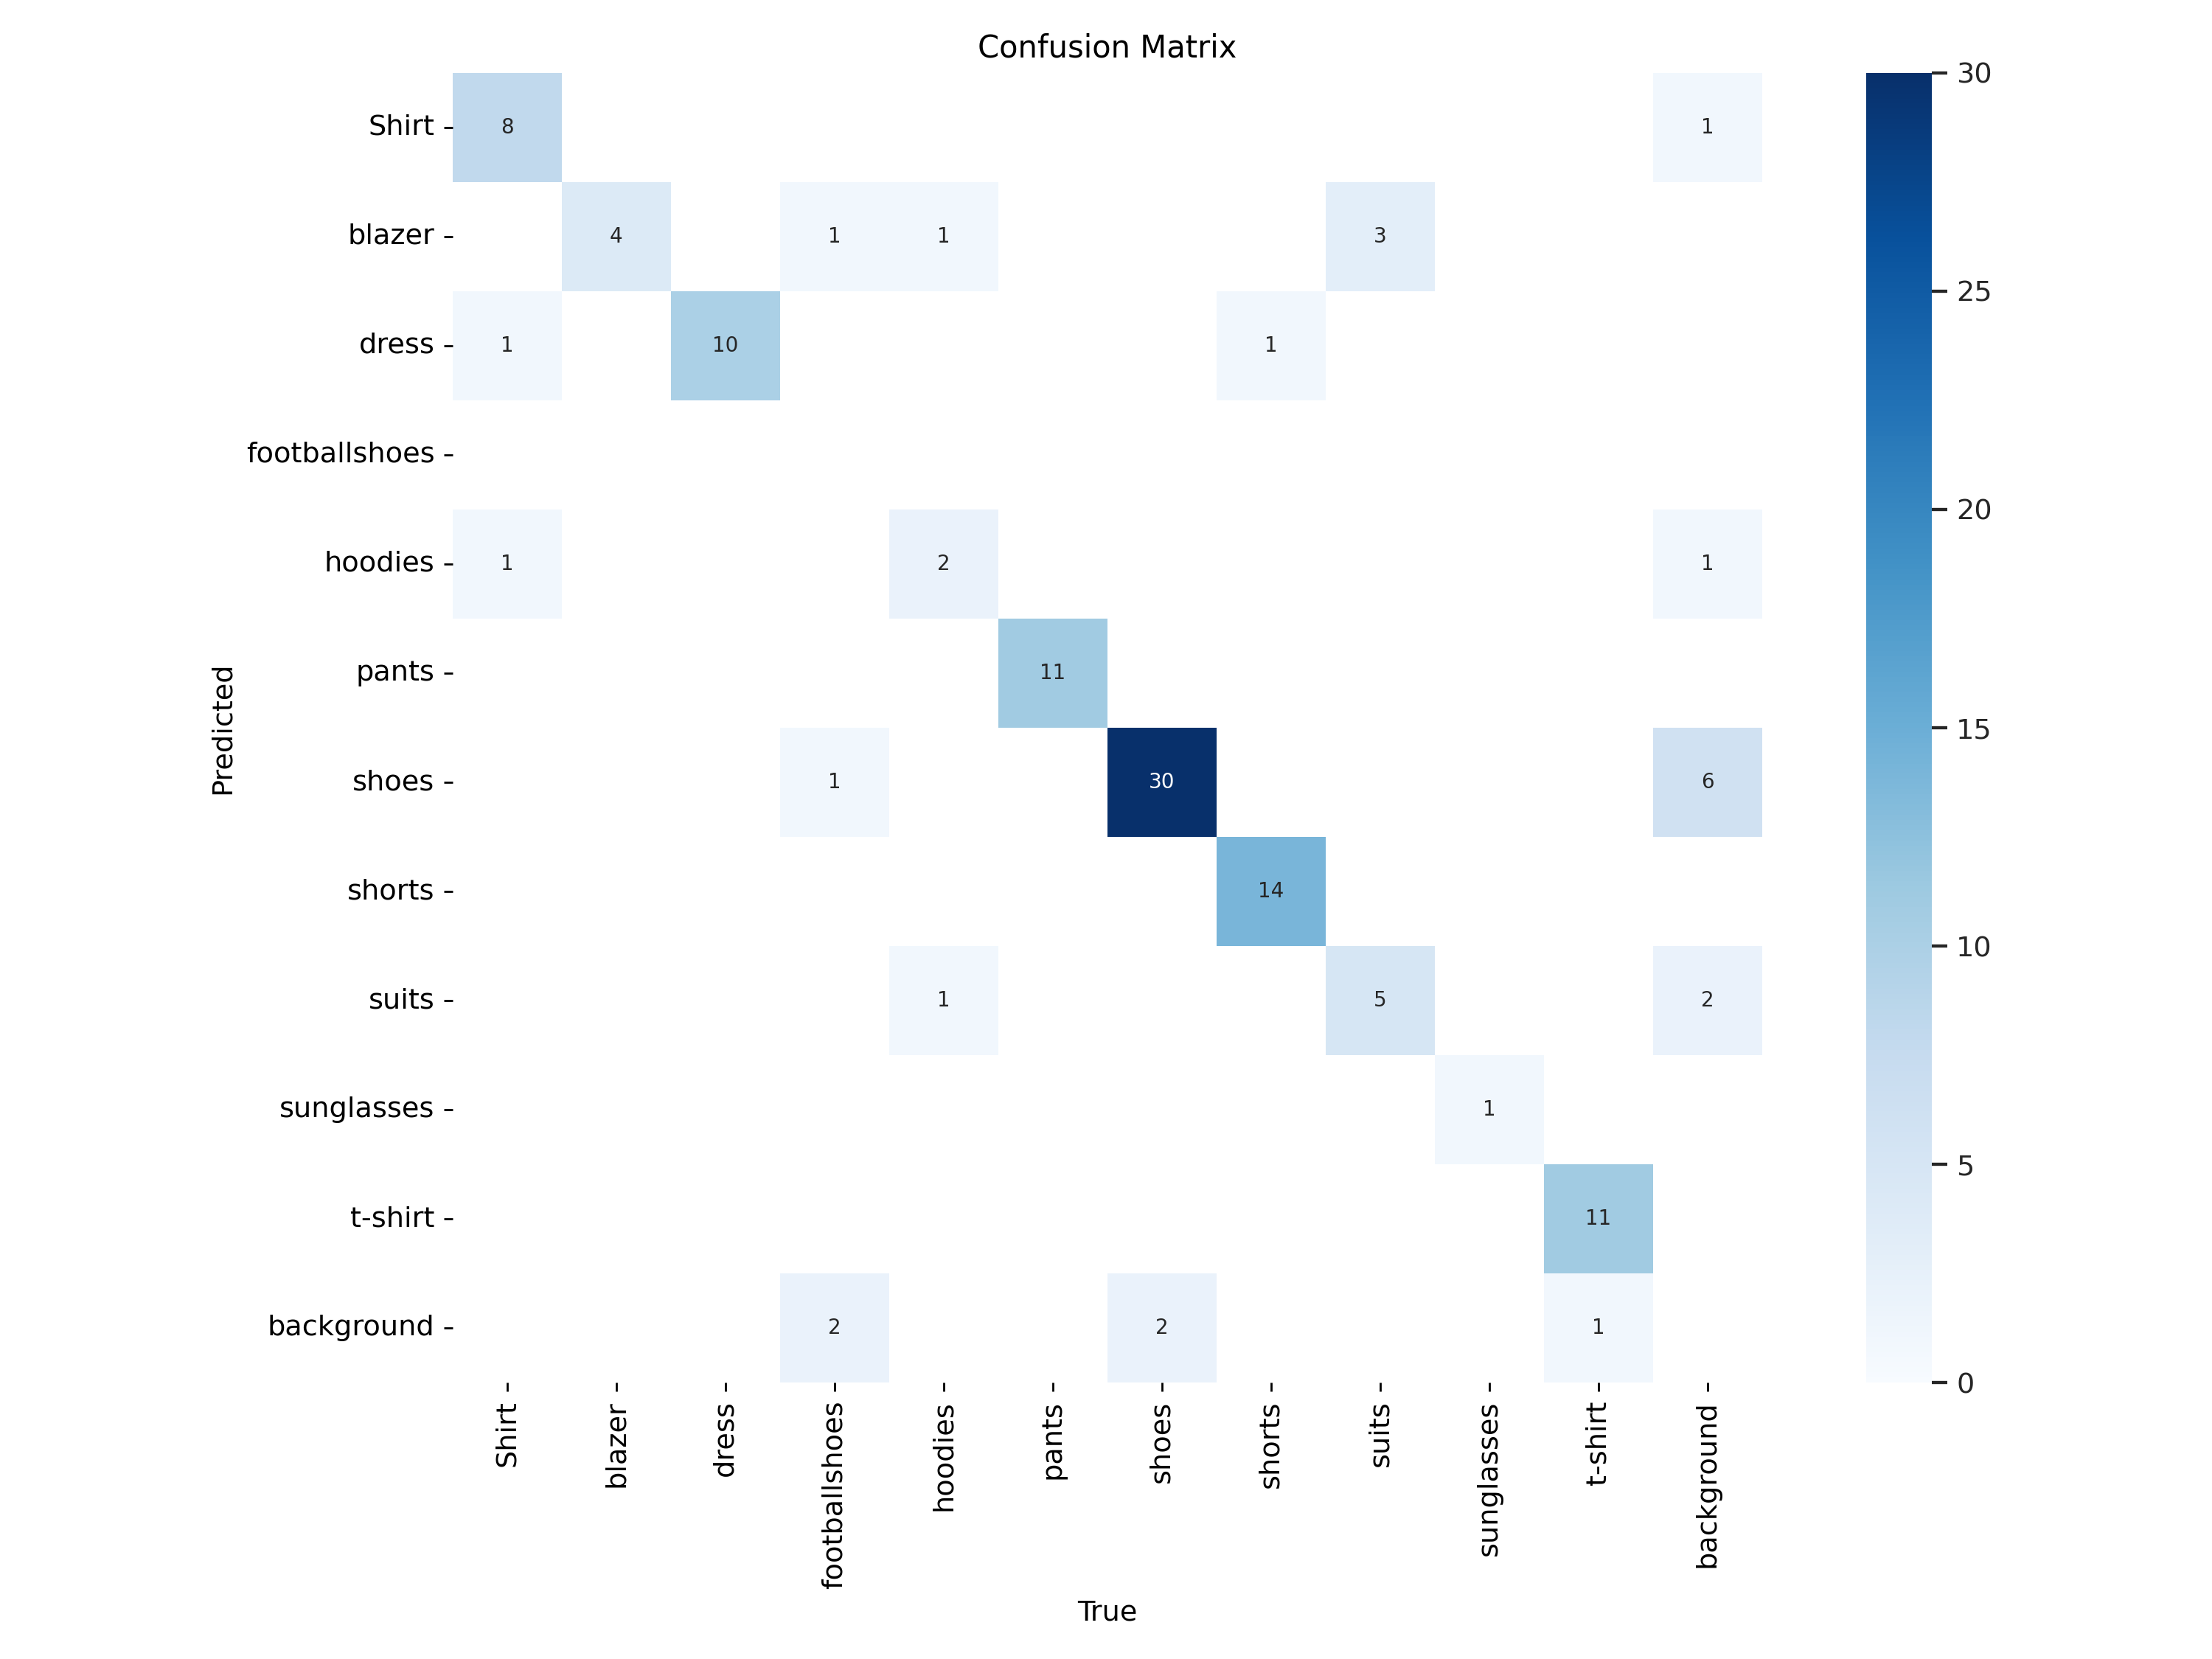

In [ ]:
Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=600)

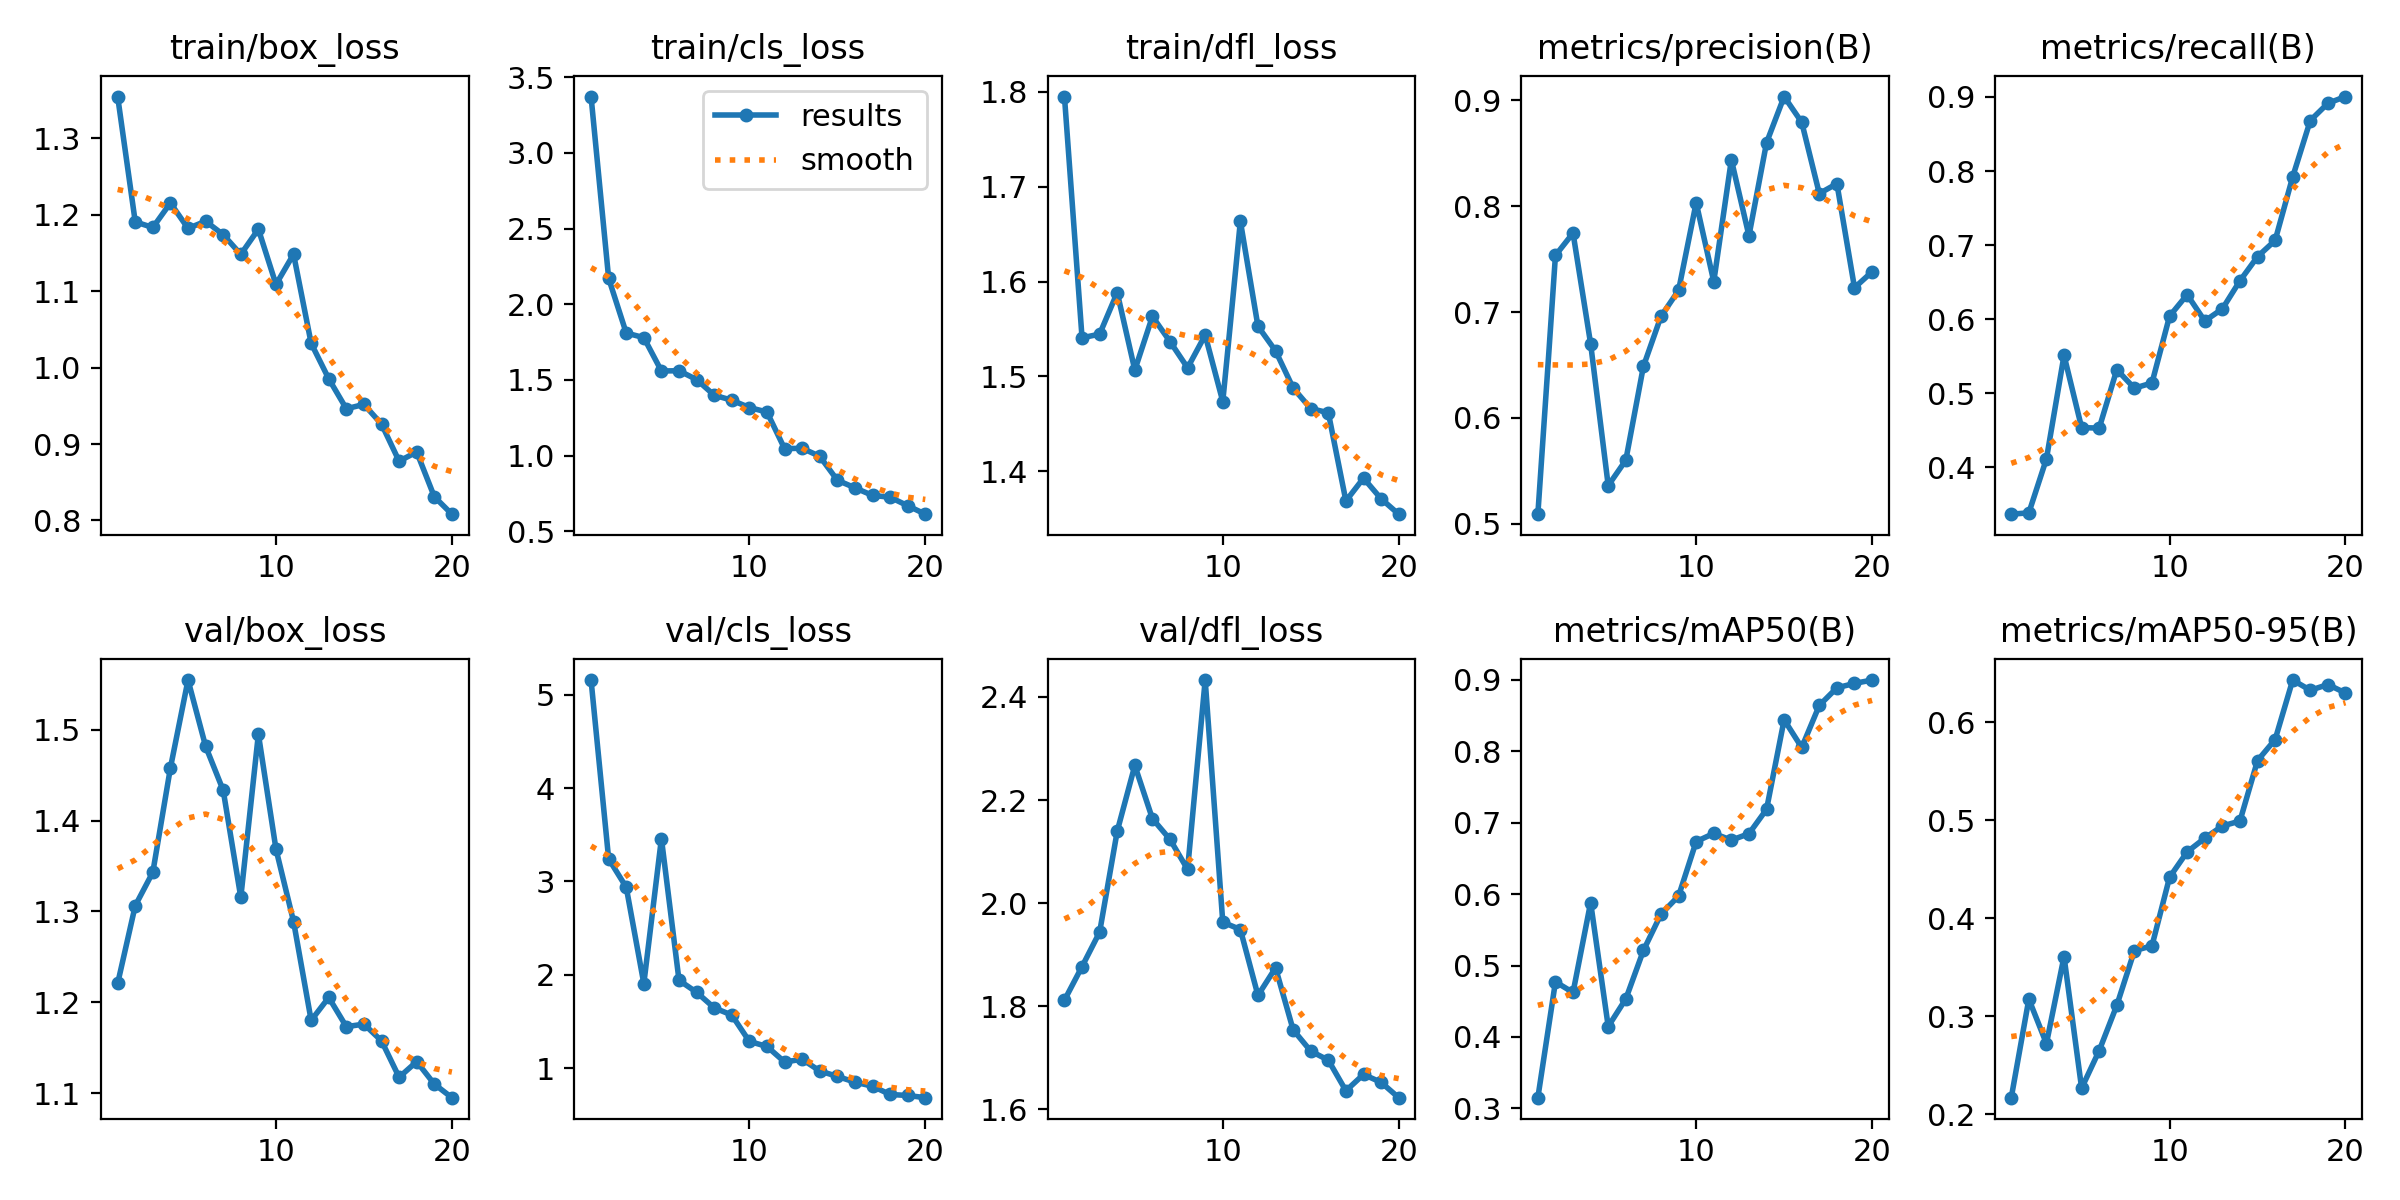

In [ ]:
Image(filename=f"/content/runs/detect/train/results.png", width=600)